# Mounting Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Defining path

In [ ]:
# Changing this path to where Dataset2 is stored in Google Drive
train_data_dir = '/content/drive/MyDrive/Dataset2/FNA'
test_data_dir = '/content/drive/MyDrive/Dataset2/test'
output_dir = '/content/drive/MyDrive/21BT30011_KARAN_MLBS/'

In [ ]:
# Importing necessary dependencies
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
# Defining the hyperparameters
img_width, img_height = 150, 150
batch_size = 32
epochs = 30
learning_rate = 0.001

# Data Augmentation for Training and Validation

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    validation_split=0.2,  # 20% data for validation
)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary',
    subset='validation'
)

Found 1380 images belonging to 2 classes.
Found 344 images belonging to 2 classes.


# Define CNN Model

In [ ]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Combining the model 
model.compile(optimizer=Adam(learning_rate=learning_rate), loss='binary_crossentropy', metrics=['accuracy'])

# Training the model and addressing Overfitting

In [ ]:
# Training the model and defining early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=epochs,
    callbacks=[early_stopping]
)

Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


44/44 ━━━━━━━━━━━━━━━━━━━━ 430s 8s/step - accuracy: 0.7598 - loss: 0.5193 - val_accuracy: 0.6017 - val_loss: 0.6980
Epoch 2/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 6s 117ms/step - accuracy: 0.8933 - loss: 0.3060 - val_accuracy: 0.6308 - val_loss: 0.7232
Epoch 3/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 8s 165ms/step - accuracy: 0.9180 - loss: 0.2453 - val_accuracy: 0.7645 - val_loss: 0.4968
Epoch 4/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 8s 119ms/step - accuracy: 0.8900 - loss: 0.2907 - val_accuracy: 0.7326 - val_loss: 0.5969
Epoch 5/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 10s 118ms/step - accuracy: 0.9121 - loss: 0.2466 - val_accuracy: 0.8343 - val_loss: 0.5010
Epoch 6/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 11s 121ms/step - accuracy: 0.8829 - loss: 0.3241 - val_accuracy: 0.8140 - val_loss: 0.4690
Epoch 7/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 6s 121ms/step - accuracy: 0.8998 - loss: 0.2668 - val_accuracy: 0.8110 - val_loss: 0.5351
Epoch 8/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 7s 129ms/step - accuracy: 0.9200 - loss: 0.2297 - val_accuracy: 0.8110 - val

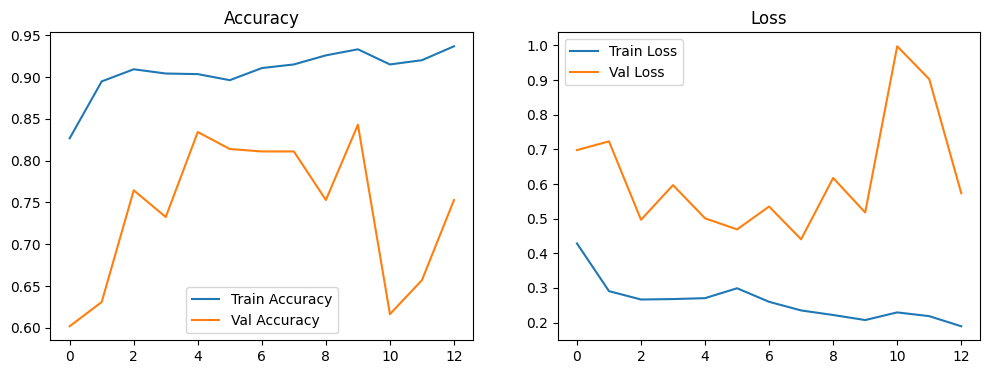

In [ ]:
# Plotting Training and Validation Loss/Accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title('Loss')
plt.show()

# Predicting from the test dataset

In [ ]:
test_datagen = ImageDataGenerator(rescale=1.0/255)
test_generator = test_datagen.flow_from_directory(
    directory=test_data_dir,
    target_size=(img_width, img_height),
    batch_size=1,
    class_mode=None,
    shuffle=False
)

predictions = model.predict(test_generator)
predictions = ['malignant' if pred > 0.5 else 'benign' for pred in predictions]


Found 14 images belonging to 1 classes.
14/14 ━━━━━━━━━━━━━━━━━━━━ 10s 740ms/step


In [ ]:
for filename, pred in zip(test_generator.filenames, predictions):
    print(f"{filename}: {pred}")

unlabelled/eight.png: malignant
unlabelled/eleven.png: malignant
unlabelled/five.png: malignant
unlabelled/four.png: malignant
unlabelled/fourteen.png: malignant
unlabelled/nine.png: malignant
unlabelled/one.png: benign
unlabelled/seven.png: benign
unlabelled/six.png: benign
unlabelled/ten.png: malignant
unlabelled/thirteen.png: malignant
unlabelled/three.png: malignant
unlabelled/twelve.png: benign
unlabelled/two.png: benign


In [ ]:
# Saving the model and write README instructions
model.save(os.path.join(output_dir, '21BT30024/model.h5'))